In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1 – Data Loading & Visualization

In [8]:
df = pd.read_csv('hand_landmarks_data.csv')
df.head()

,x1,y1,z1,x2,y2,z2,x3,y3,z3,x4,...,x19,y19,z19,x20,y20,z20,x21,y21,z21,label
0,262.669968,257.304901,-3.649205e-07,257.417542,247.109055,0.004224,246.882957,241.716827,0.005798,236.384537,...,223.345093,255.490692,-0.020450,215.043365,258.114746,-0.024577,208.006393,259.608673,-0.026722,call
1,83.351778,346.059113,-2.345265e-07,81.925037,328.562347,-0.011102,90.080132,311.535248,-0.021096,95.641823,...,132.451618,341.794434,-0.038175,142.773582,342.829254,-0.037336,152.431698,343.015991,-0.036136,call
2,187.756977,260.235492,-2.417307e-07,195.460579,241.506035,-0.000184,207.259529,223.674339,-0.009687,215.413628,...,250.301010,268.602938,-0.044068,262.425133,271.276638,-0.040469,272.989952,272.272231,-0.038301,call
3,114.976696,331.594238,-1.233261e-07,114.503494,320.549957,-0.002824,116.636627,310.080994,-0.008911,117.685066,...,145.195450,329.357544,-0.027622,151.053200,329.712341,-0.027863,155.990364,329.548828,-0.027723,call
4,188.795288,141.727867,-1.622995e-07,188.520905,127.947464,-0.002884,191.982880,111.010563,-0.008115,192.552521,...,226.696396,132.263248,-0.025113,234.831741,130.684147,-0.024087,241.587769,128.477188,-0.023486,call


In [9]:
df.shape

(25675, 64)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25675 entries, 0 to 25674
Data columns (total 64 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      25675 non-null  float64
 1   y1      25675 non-null  float64
 2   z1      25675 non-null  float64
 3   x2      25675 non-null  float64
 4   y2      25675 non-null  float64
 5   z2      25675 non-null  float64
 6   x3      25675 non-null  float64
 7   y3      25675 non-null  float64
 8   z3      25675 non-null  float64
 9   x4      25675 non-null  float64
 10  y4      25675 non-null  float64
 11  z4      25675 non-null  float64
 12  x5      25675 non-null  float64
 13  y5      25675 non-null  float64
 14  z5      25675 non-null  float64
 15  x6      25675 non-null  float64
 16  y6      25675 non-null  float64
 17  z6      25675 non-null  float64
 18  x7      25675 non-null  float64
 19  y7      25675 non-null  float64
 20  z7      25675 non-null  float64
 21  x8      25675 non-null  float64
 22

In [17]:
df['label'].value_counts()

label
three2             1653
palm               1649
four               1634
ok                 1592
stop_inverted      1567
call               1506
peace_inverted     1497
stop               1482
rock               1458
three              1456
peace              1441
like               1436
two_up_inverted    1371
two_up             1343
dislike            1295
one                1263
mute               1087
fist                945
Name: count, dtype: int64

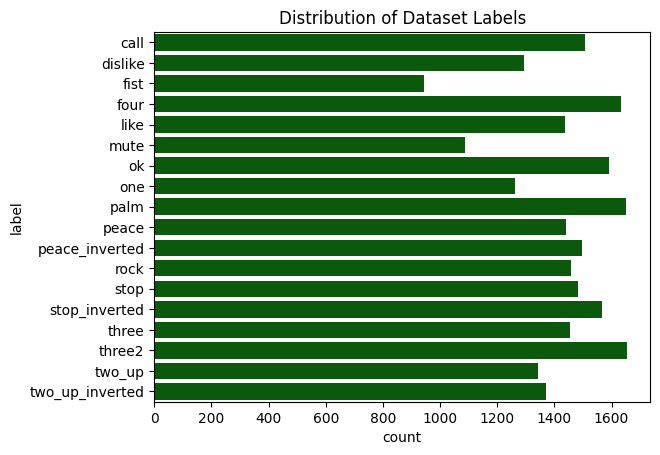

In [38]:
sns.countplot(df['label'],color='darkgreen')
plt.title('Distribution of Dataset Labels')
plt.show()

In [59]:
connections = [
    (0, 1), (1, 2), (2, 3), (3, 4),          # Thumb
    (0, 5), (5, 6), (6, 7), (7, 8),          # Index finger
    (5, 9), (9, 10), (10, 11), (11, 12),     # Middle finger
    (9, 13), (13, 14), (14, 15), (15, 16),   # Ring finger
    (13, 17), (0, 17), (17, 18), (18, 19), (19, 20) # Pinky base & finger
]

In [81]:
df['label'].unique()

array(['call', 'dislike', 'fist', 'four', 'like', 'mute', 'ok', 'one',
       'palm', 'peace', 'peace_inverted', 'rock', 'stop', 'stop_inverted',
       'three', 'three2', 'two_up', 'two_up_inverted'], dtype=object)

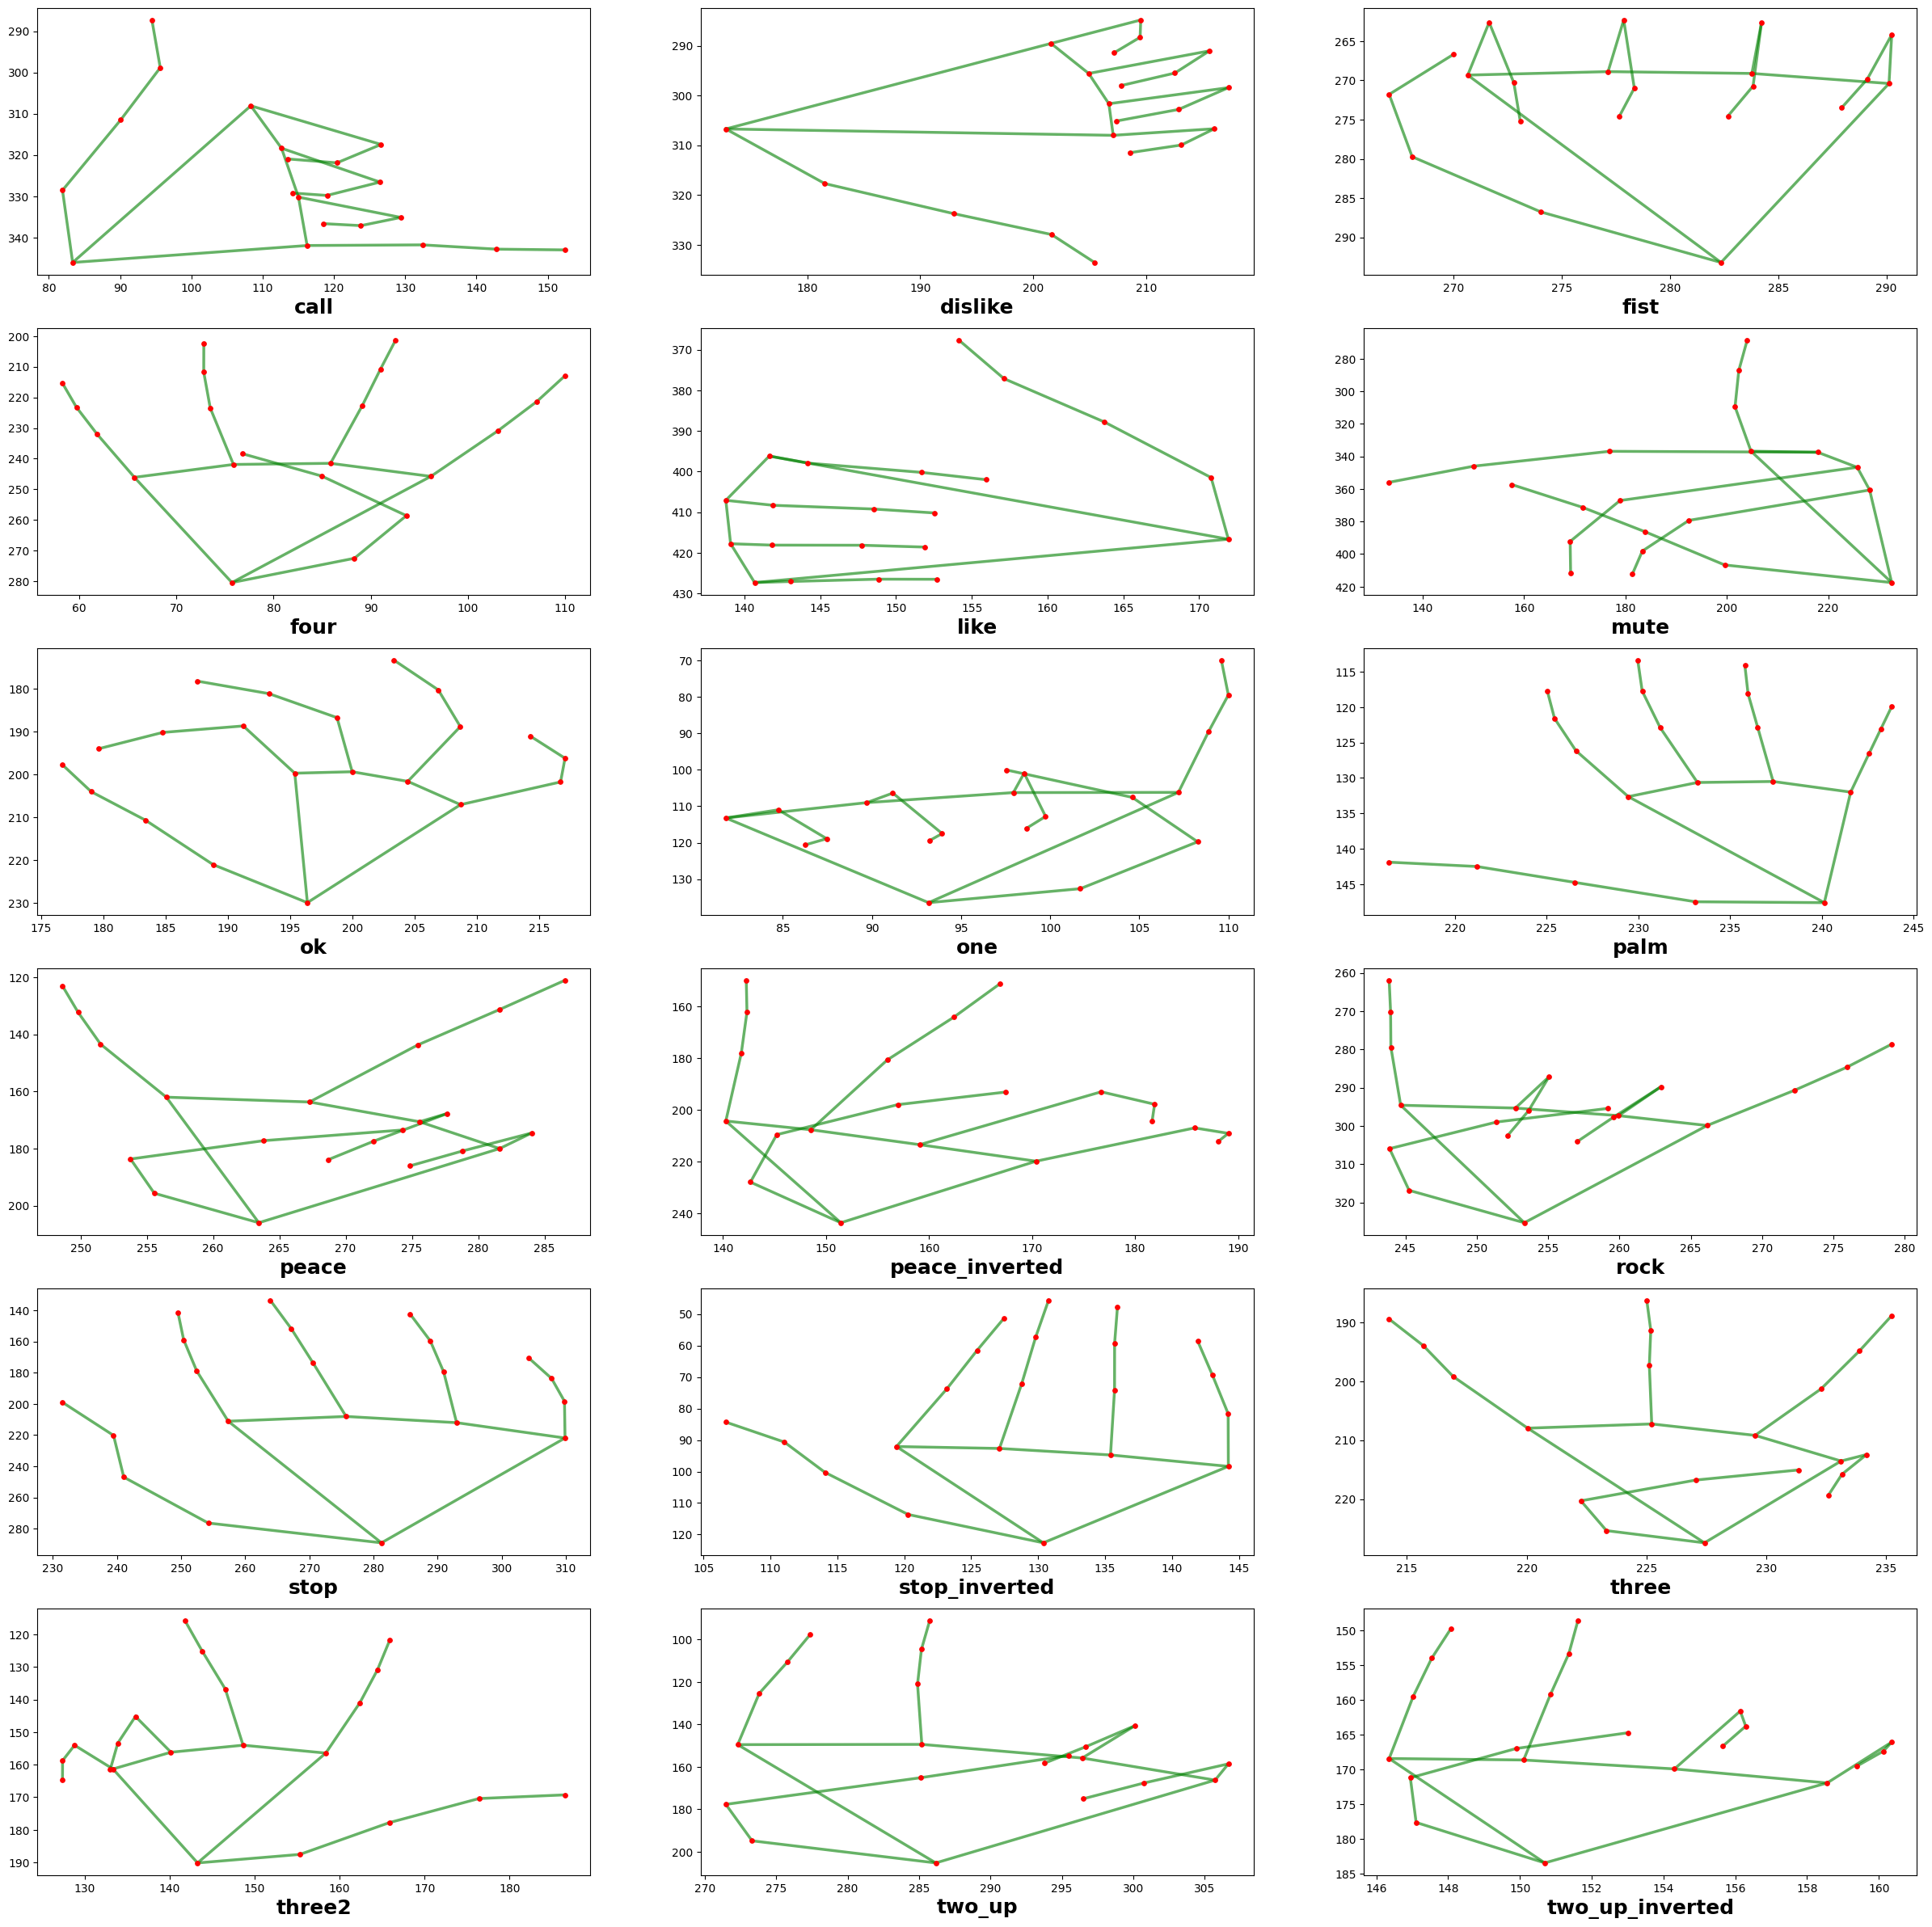

In [91]:
sample_df = df.iloc[[1,1613,2960,4150,6043,6891, 8100, 9600,10760,12600,14000,15500,16880,19000,19860,21310,23000,24306]].reset_index()
#        'call', 'dislike', 'fist', 'four', 'like', 'mute', 'ok', 'one',
#        'palm', 'peace', 'peace_inverted', 'rock', 'stop', 'stop_inverted',
#        'three', 'three2', 'two_up', 'two_up_inverted'
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(30,30))
axes = axes.flatten()
for i in range (len(sample_df)):
    ax = axes[i]
    ax.invert_yaxis()
    for pt1, pt2 in connections:
            xs = [sample_df.loc[i,f'x{k}'] for k in range(1,22)]
            ys = [sample_df.loc[i,f'y{k}'] for k in range(1,22)]
            ax.plot([xs[pt1], xs[pt2]], [ys[pt1], ys[pt2]], 'g-', linewidth=2.5, alpha=0.6)
    ax.scatter(xs, ys, c='red', s=15, zorder=5)
    ax.set_xlabel(sample_df.loc[i,'label'],fontsize=18, fontweight='bold')
